In [2]:
import os
import numpy as np
import pandas as pd
from sktime.datasets import load_UCR_UEA_dataset
from sktime.datasets import tsc_dataset_names
import matplotlib.pyplot as plt

In [3]:
'Strawberry' in tsc_dataset_names.univariate

True

In [4]:
dataset_handle = 'Strawberry'
dataset_name = 'strawberry'
processed_dir = './../../processed/'
output_dir = f'./../../processed/{dataset_name}/'
os.makedirs(output_dir, exist_ok=True)
full_outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
test_key_outp_fname = os.path.join(output_dir, f'{dataset_name}_test_key.csv')
train_outp_fname = os.path.join(output_dir, f'{dataset_name}_train.csv')
test_outp_fname = os.path.join(output_dir, f'{dataset_name}_test.csv')



## Load training data

In [5]:
X_train, y_train = load_UCR_UEA_dataset(name=dataset_handle, split='TRAIN')
X_test, y_test = load_UCR_UEA_dataset(name=dataset_handle, split='TEST')

In [6]:
def prepare_dataset(X, y):
    df = {}
    label_column = []
    for i, row in X.iterrows():
        label = y[i]
        for column in X.columns:
            series_values = row[column].tolist()
            if column in df:
                df[column].extend(series_values)
            else:
                df[column] = series_values
        label_column += [label] * len(series_values)

    df['label'] = label_column
    df = pd.DataFrame(df)
    df.insert(0, 'series_id', 0)
    timestep = list(range(len(df)))
    df.insert(1, 'timestep', timestep)

    return df

            


In [7]:
train_df = prepare_dataset(X_train, y_train)
test_df = prepare_dataset(X_test, y_test)

full = pd.concat([train_df, test_df])


test_key_df = test_df[['series_id', 'timestep', 'label']]
test_df.drop(columns=['label'], inplace=True)

In [8]:
train_df

,series_id,timestep,dim_0,label
0,0,0,-0.553834,2
1,0,1,-0.582111,2
2,0,2,-0.609242,2
3,0,3,-0.610770,2
4,0,4,-0.594721,2
...,...,...,...,...
144050,0,144050,-1.118347,2
144051,0,144051,-1.127154,2
144052,0,144052,-1.134093,2
144053,0,144053,-1.134093,2


In [9]:
full.to_csv(full_outp_fname, index=False)
test_key_df.to_csv(test_key_outp_fname, index=False)
train_df.to_csv(train_outp_fname, index=False)
test_df.to_csv(test_outp_fname, index=False)

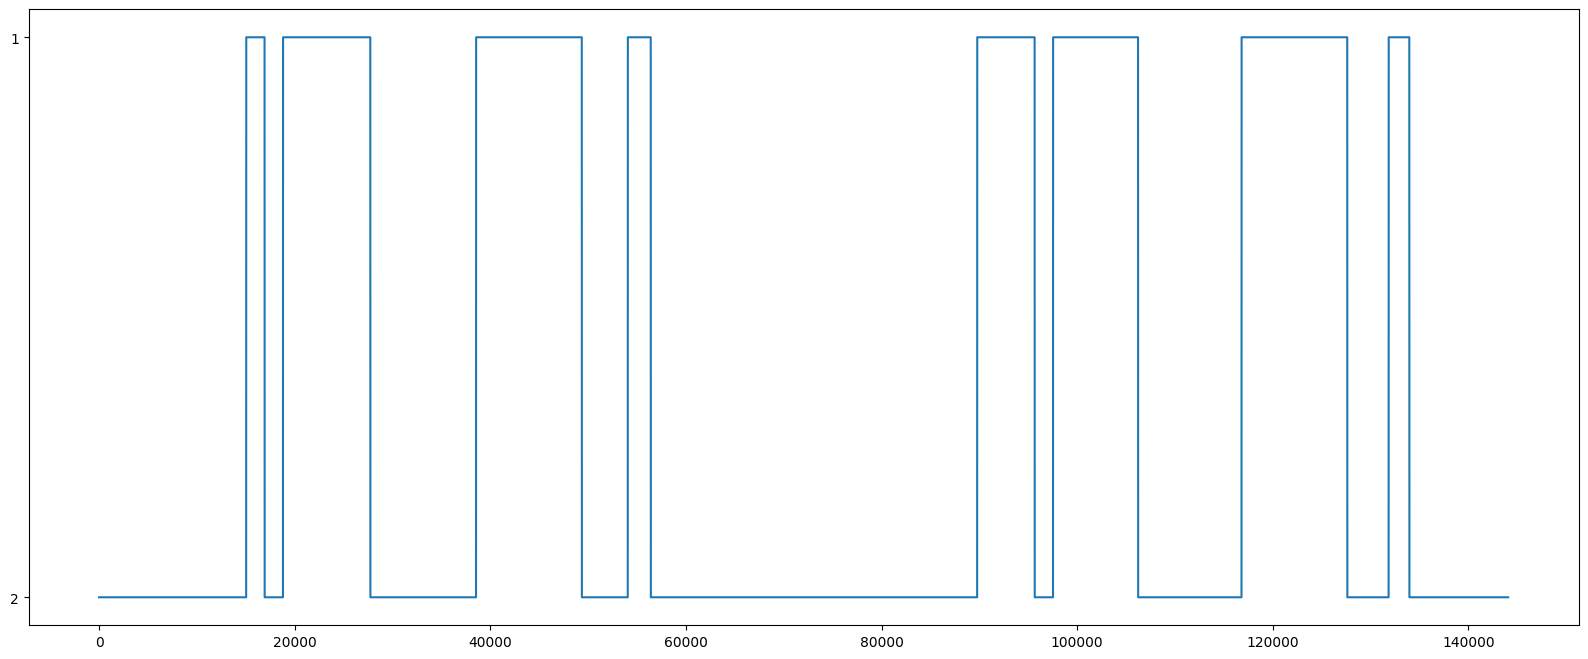

In [15]:
plt.figure(figsize=(20,8))
plt.plot(train_df['label'])

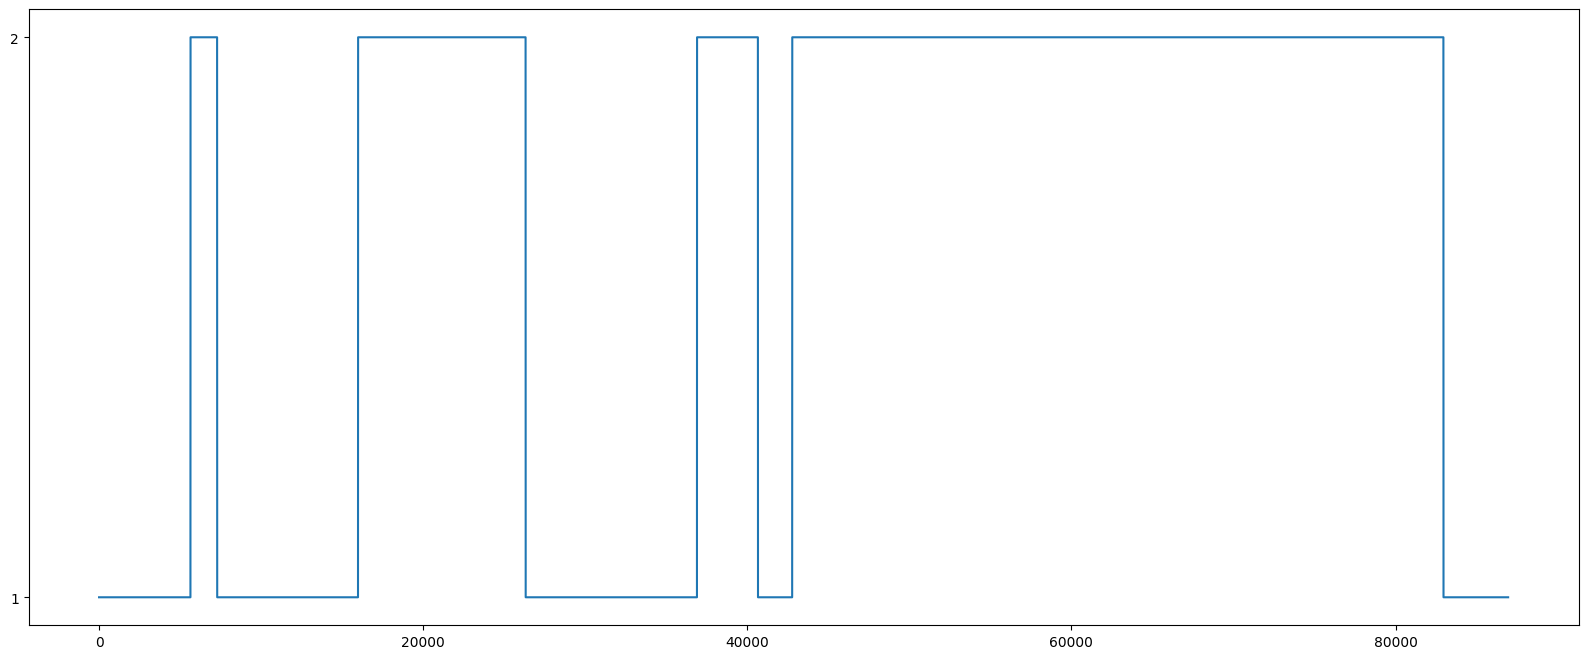

In [16]:
plt.figure(figsize=(20,8))
plt.plot(test_key_df['label'])

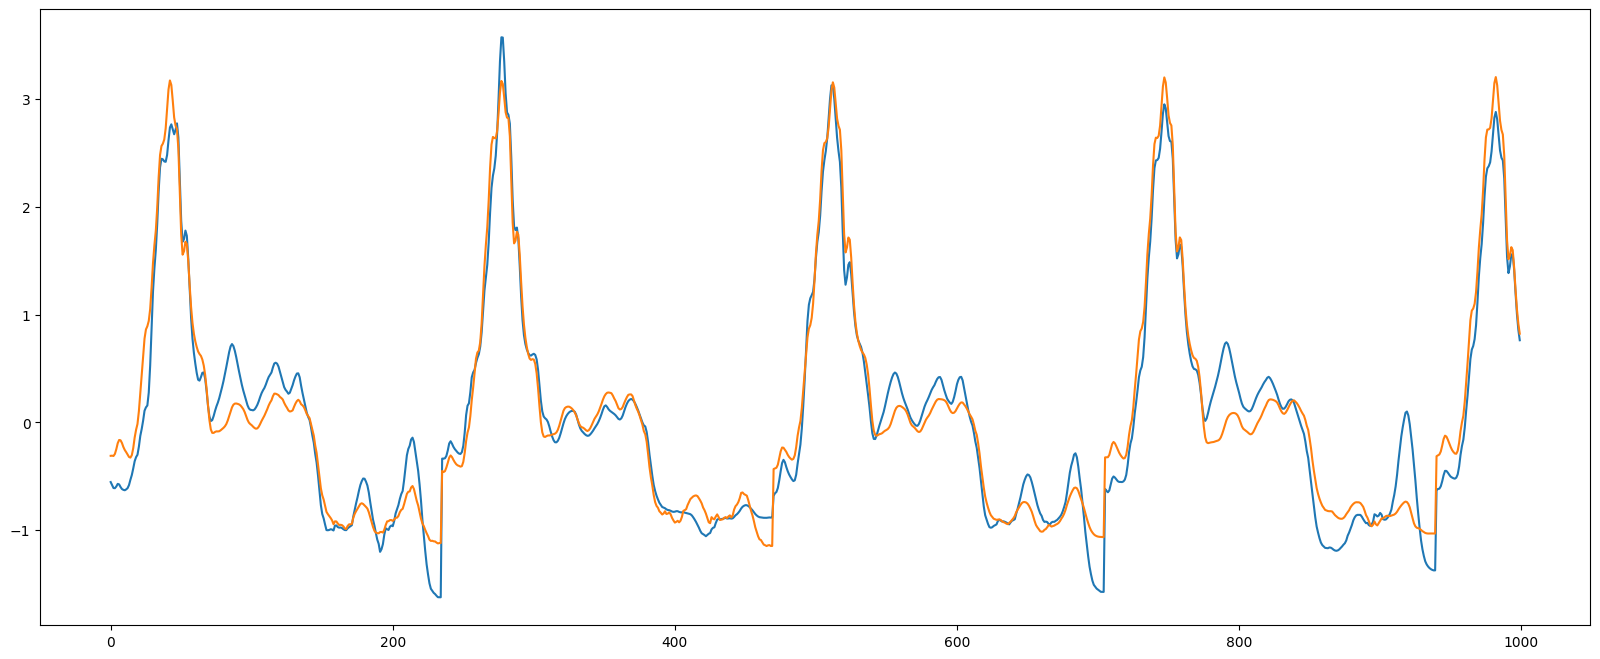

In [24]:
plt.figure(figsize=(20,8))

plt.plot(train_df['dim_0'].iloc[0:1000])
plt.plot(test_df['dim_0'].iloc[0:1000])